In [1]:
stadium_url = "https://en.hispanosnba.com/nba-arenas"

In [2]:
!pip install requests

In [3]:
!pip install beautifulsoup4

In [27]:
import requests

url = stadium_url

data = requests.get(url)

with open("stadium/stadium_html.html", "w+",encoding="utf-8") as f:
    f.write(data.text)

In [28]:
from bs4 import BeautifulSoup

with open("stadium/stadium_html.html",encoding="utf-8") as f:
    page = f.read()
    
soup = BeautifulSoup(page, 'html.parser')


In [29]:
stadium_table = soup.find_all("table",{"class":"tblest"})

In [31]:
import pandas as pd

stadium = pd.read_html(str(stadium_table))[0]

In [32]:
stadium

,Team,Arena,Seats,Year,Owner
0,Atlanta Hawks,State Farm Arena,16600,1999,Public
1,Boston Celtics,TD Garden,18624,1995,Private
2,Brooklyn Nets,Barclays Center,17732,2012,Public
3,Charlotte Hornets,Spectrum Center,19077,2005,Public
4,Chicago Bulls,United Center,20917,1994,Private
5,Cleveland Cavaliers,Rocket Mortgage FieldHouse,19432,1994,Public
6,Dallas Mavericks,American Airlines Center,19200,2001,Public
7,Denver Nuggets,Ball Arena,19520,1999,Private
8,Detroit Pistons,Little Caesars Arena,20332,2017,Public
9,Golden State Warriors,Chase Center,18064,2019,Private


In [33]:
stadium.to_csv("stadium.csv")

In [2]:
import pandas as pd
stadium_df = pd.read_csv("stadium.csv")

In [4]:
del stadium_df["Year"]

In [5]:
del stadium_df["Owner"]

In [8]:
del stadium_df["Unnamed: 0"]

In [9]:
stadium_df

,Team,Arena,Seats
0,Atlanta Hawks,State Farm Arena,16600
1,Boston Celtics,TD Garden,18624
2,Brooklyn Nets,Barclays Center,17732
3,Charlotte Hornets,Spectrum Center,19077
4,Chicago Bulls,United Center,20917
5,Cleveland Cavaliers,Rocket Mortgage FieldHouse,19432
6,Dallas Mavericks,American Airlines Center,19200
7,Denver Nuggets,Ball Arena,19520
8,Detroit Pistons,Little Caesars Arena,20332
9,Golden State Warriors,Chase Center,18064


In [7]:
import mysql.connector
NBA_sql = mysql.connector.connect(host = 'localhost', user = 'root',passwd = '@Lamborgini1998', database = 'NBA_WS', auth_plugin='mysql_native_password')
mycursor = NBA_sql.cursor()

In [10]:
for i,row in stadium_df.iterrows():   
    sql = "INSERT INTO NBA_WS.STADIUM values (%s,%s,%s)"
    mycursor.execute(sql,tuple(row))
    print("Record inserted")
    NBA_sql.commit()

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
stadium_df_vis = pd.read_csv("stadium_vis.csv")

In [13]:
stadium_df_vis

,Unnamed: 0,Team,Arena,Seats,Year,Owner
0,0,Atlanta Hawks,State Farm Arena,16600,1999,Public
1,1,Boston Celtics,TD Garden,18624,1995,Private
2,2,Brooklyn Nets,Barclays Center,17732,2012,Public
3,3,Charlotte Hornets,Spectrum Center,19077,2005,Public
4,4,Chicago Bulls,United Center,20917,1994,Private
5,5,Cleveland Cavaliers,Rocket Mortgage FieldHouse,19432,1994,Public
6,6,Dallas Mavericks,American Airlines Center,19200,2001,Public
7,7,Denver Nuggets,Ball Arena,19520,1999,Private
8,8,Detroit Pistons,Little Caesars Arena,20332,2017,Public
9,9,Golden State Warriors,Chase Center,18064,2019,Private


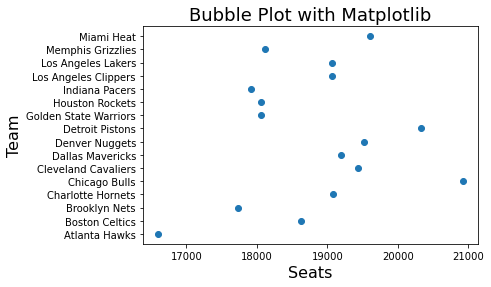

In [27]:
plt.figure(figsize=(6, 4))
plt.scatter('Seats', 'Team',data=stadium_df_vis)
plt.xlabel("Seats", size=16)
plt.ylabel("Team", size=16)
plt.title("Bubble Plot with Matplotlib", size=18)
plt.show()